#### Fardin Rastakhiz @2023

# Test Sentiment Classification
### On SnapFood, Cooccurrence Graph Dataseet

In [1]:
import numpy as np
from Scripts.Configs.ConfigClass import Config
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
from lightning.pytorch.loggers import CSVLogger
import os
from Scripts.DataManager.GraphLoader.AmazonReviewGraphDataModule import AmazonReviewGraphDataModule
import time
import torch

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence')
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = 'cuda'
batch_size = 256

In [3]:
tag_dep_seq_sent = TextGraphType.CO_OCCURRENCE
data_manager = AmazonReviewGraphDataModule(config, True, True, shuffle=False, start_data_load=0 , end_data_load = -1, device='cpu', batch_size=batch_size, graph_type=tag_dep_seq_sent, load_preprocessed_data = True)
data_manager.load_labels()
data_manager.load_graphs()

filename: C:\Users\fardin\Projects\ColorIntelligence\data/GraphData/AmazonReview\co_occ\graph_var.txt


 Loding Graphs From File : 100%|██████████| 110/110 [08:17<00:00,  4.53s/it]

self.shuffle: False


In [10]:
# data_manager.update_batch_size(128)
t_dataloader = data_manager.train_dataloader()
v_dataloader = data_manager.val_dataloader()
X1, y1 = next(iter(t_dataloader))
X2, y2 = next(iter(v_dataloader))
# X1.metadata()
len(X1)

256

In [11]:
from Scripts.Models.GraphEmbedding.HomogeneousDeepGraphEmbedding2 import HomogeneousDeepGraphEmbedding2

In [12]:
from Scripts.Models.LightningModels.LightningModels import BinaryLightningModel
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [13]:
graph_embedding = HomogeneousDeepGraphEmbedding2(300, 1, 128, dropout=0.2)
graph_embedding = graph_embedding.to(device)

In [14]:
# graph_embedding(X1.to(device))

In [15]:
# lightning_model = HeteroBinaryLightningModel.load_from_checkpoint(r'C:\Users\fardin\Projects\ColorIntelligence\logs\hetero_model_5\version_0\checkpoints\epoch=7-step=2056.ckpt', model=)

callbacks = [
    ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True),
    # EarlyStopping(patience=50, mode='max', monitor='val_acc')
]
lightning_model = BinaryLightningModel(graph_embedding,
                                 torch.optim.Adam(graph_embedding.parameters(), lr=0.004, weight_decay=0.001),
                                       loss_func=torch.nn.BCEWithLogitsLoss(),
                                       learning_rate=0.004,
                                       batch_size=batch_size,
                                       user_lr_scheduler=True,
                                       min_lr=0.00003
                                       ).to(device)
model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='homogeneous_1', model_save_dir=r'C:\Users\fardin\Projects\ColorIntelligence\Practices\Tasks\HeterogeneousGraphs\homogeneous_1',device=device, num_train_epoch=70)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [16]:
# model_manager.tune(data_manager=data_manager, min_lr=1e-5, max_lr = 1e-2)

In [17]:
model_manager.fit(datamodule=data_manager)

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:43: attribute 'model' removed from hparams because it cannot be pickled
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                           | Params
-------------------------------------------------------------
0 | model     | HomogeneousDeepGraphEmbedding2 | 354 K 
1 | loss_func | BCEWithLogitsLoss              | 0     
2 | train_acc | BinaryAccuracy                 | 0     
3 | val_acc   | BinaryAccuracy                 | 0     
4 | test_acc  | BinaryAccuracy                 | 0     
-------------------------------------------------------------
354 K     Trainable params
0         Non-trainable params
354 K     Total params
1.416     Total estimated model params size (MB)


bbbb


c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=70` reached.


In [21]:
model_manager.torch_model = model_manager.torch_model.to(device)

model_manager.draw_summary(t_dataloader)

+---------------------------------+---------------------------------------------------+-----------------------------+----------+
| Layer                           | Input Shape                                       | Output Shape                | #Param   |
|---------------------------------+---------------------------------------------------+-----------------------------+----------|
| HomogeneousDeepGraphEmbedding2  | [15672, 15672]                                    | [256, 1]                    | 354,069  |
| ├─(attention)Sequential_b693c4  | [15672, 300], [15672, 300], [2, 122534], [122534] | [15672, 128], [15672, 300]  | 344,720  |
| │    └─(module_0)GATv2Conv      | [15672, 300], [2, 122534]                         | [15672, 300]                | 181,200  |
| │    └─(module_1)BatchNorm      | [15672, 300]                                      | [15672, 300]                | 600      |
| │    │    └─(module)BatchNorm1d | [15672, 300]                                      | [15672, 3

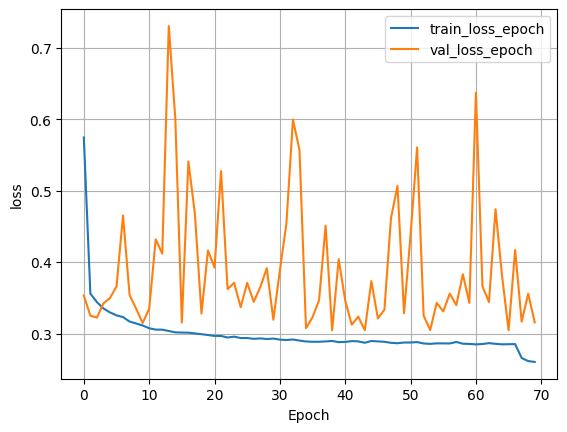

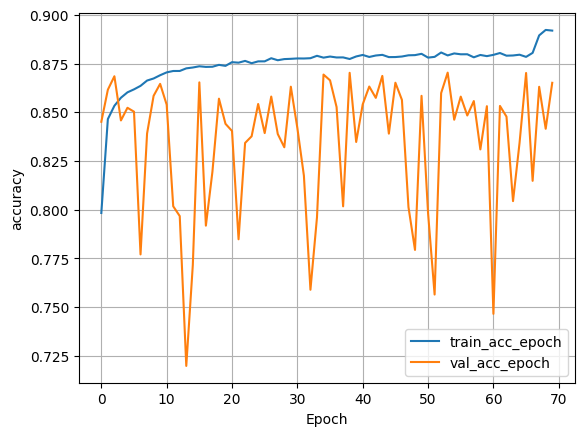

In [22]:
model_manager.plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss_epoch'], eval_names=['train_acc_epoch', 'val_acc_epoch'])

In [23]:
model_manager.evaluate(data_manager.test_dataloader(), give_accuracy_score=True, give_hinge_loss=True)

confusion_matrix: 
[[9080 1763]
 [1298 9859]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     10843
           1       0.85      0.88      0.87     11157

    accuracy                           0.86     22000
   macro avg       0.86      0.86      0.86     22000
weighted avg       0.86      0.86      0.86     22000

accuracy_score: 0.8608636363636364
hinge_loss: 0.632


In [ ]:
model_manager.trainer.checkpoint_callback.best_model_path

'logs/hetero_model_6\\version_9\\checkpoints\\epoch=30-step=127875.ckpt'